In [1]:
from pathlib import Path 
import pandas as pd 
import cv2 
import os
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
path = Path('/home/sonujha/rnd/Severstal-Steel-Defect-Detection/data')
os.listdir(path)

['train_images', 'train.csv', 'sample_submission.csv', 'test_images']

In [3]:
train_images = glob(str(path/'train_images/*'))
test_images = glob(str(path/'test_images'))
print(train_images[:5])
len(train_images), len(test_images)

['/home/sonujha/rnd/Severstal-Steel-Defect-Detection/data/train_images/b712be0ba.jpg', '/home/sonujha/rnd/Severstal-Steel-Defect-Detection/data/train_images/ce54cb872.jpg', '/home/sonujha/rnd/Severstal-Steel-Defect-Detection/data/train_images/170c6b1b7.jpg', '/home/sonujha/rnd/Severstal-Steel-Defect-Detection/data/train_images/358a4fc0c.jpg', '/home/sonujha/rnd/Severstal-Steel-Defect-Detection/data/train_images/bf3db21e9.jpg']


(12568, 1)

**Only one test image is given just to validate the inference pipeline**

In [4]:
# Explore the csv file 
train_df = pd.read_csv(path/'train.csv')

In [5]:
train_df.shape

(7095, 3)

In [6]:
train_df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [7]:
print(train_df['ImageId'].nunique(), train_df.ClassId.unique())

6666 [1 3 4 2]


`why duplidate ImageId`

**So, There are lots of images, and labels are only available for 7095 images, lets visualize few images**

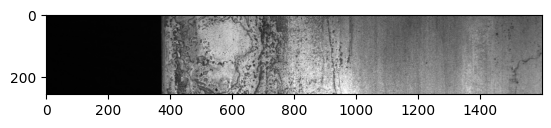

In [8]:
img = cv2.imread(train_images[0])
plt.imshow(img)
plt.show()

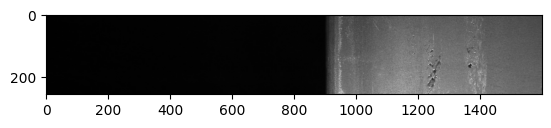

In [9]:
img = cv2.imread(train_images[1])
plt.imshow(img)
plt.show()

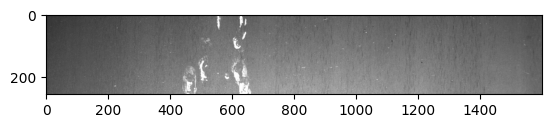

In [10]:
img = cv2.imread(train_images[2])
plt.imshow(img)
plt.show()

In [11]:
img.shape

(256, 1600, 3)

**Looks like every image has fixed, size, lets draw the bounding boxes**

In [12]:
#img_id, class_id, encoded_pixels = train_df.iloc[0]

In [13]:
#encoded_pixels

In [14]:
#train_df.ClassId.isna().sum()

In [31]:
train_df.columns

Index(['ImageId', 'ClassId', 'EncodedPixels'], dtype='object')

In [39]:
df = train_df.groupby("ImageId")['EncodedPixels'].apply(list).reset_index()
df.head()

,ImageId,EncodedPixels
0,0002cc93b.jpg,[29102 12 29346 24 29602 24 29858 24 30114 24 ...
1,0007a71bf.jpg,[18661 28 18863 82 19091 110 19347 110 19603 1...
2,000a4bcdd.jpg,[37607 3 37858 8 38108 14 38359 20 38610 25 38...
3,000f6bf48.jpg,[131973 1 132228 4 132483 6 132738 8 132993 11...
4,0014fce06.jpg,[229501 11 229741 33 229981 55 230221 77 23046...


In [41]:
t = [len(x) for x in df['EncodedPixels'].to_list()]
max(t), min(t)

(3, 1)

In [56]:
img_id, rle = df.iloc[5740]
len(rle)

3

In [15]:
def get_mask(row_id):
    img_id, c, encoded_pixels = train_df.iloc[row_id]
    masks = np.zeros((256, 1600, 4), dtype=np.float32)  # 4 classes
    labels = encoded_pixels.split(' ')
    positions = map(int, labels[0::2])
    length = map(int, labels[1::2])
    
    mask = np.zeros(256 * 1600, dtype=np.uint8)
    for pos, le in zip(positions, length):
        mask[pos: (pos+le)] = c
    mask = mask.reshape(256, 1600, order='F')
    return img_id, mask

In [16]:
# Today

In [17]:
train_df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [18]:
img_id, mask = get_mask(3)
np.unique(mask)

array([0, 4], dtype=uint8)

In [19]:

def plot_image_mask(idx):
    img_id, mask = get_mask(idx)
    img = os.path.join(path, 'train_images',  img_id)
    img = np.array(Image.open(img))
    
    plt.figure(figsize=(50, 100))
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    
    plt.subplot(1, 3, 2)
    plt.imshow(img)
    plt.imshow(mask, alpha=0.3)
    plt.show()

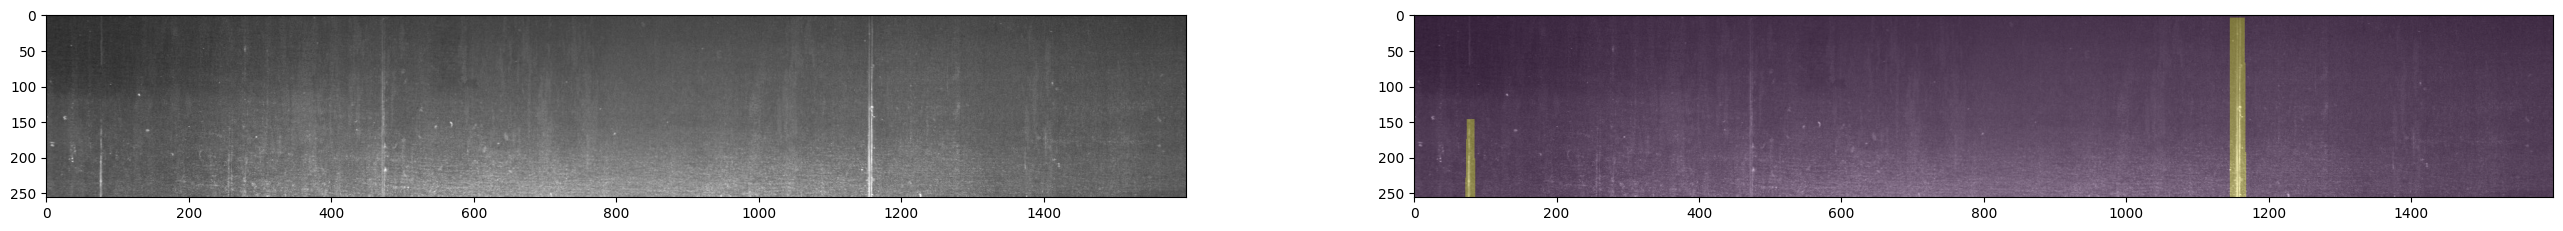

In [20]:
plot_image_mask(1)

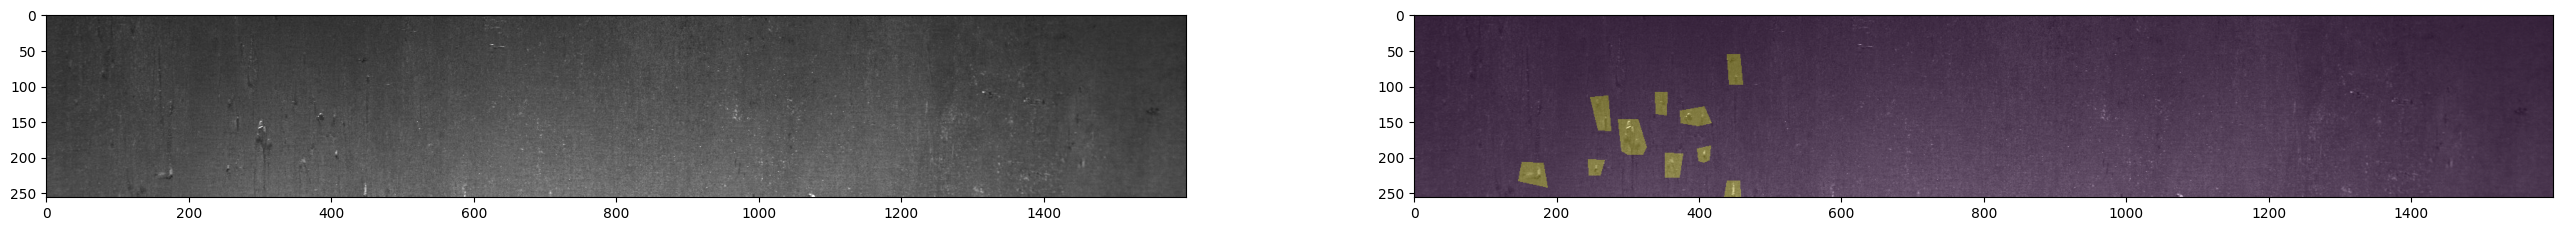

In [21]:
plot_image_mask(2)

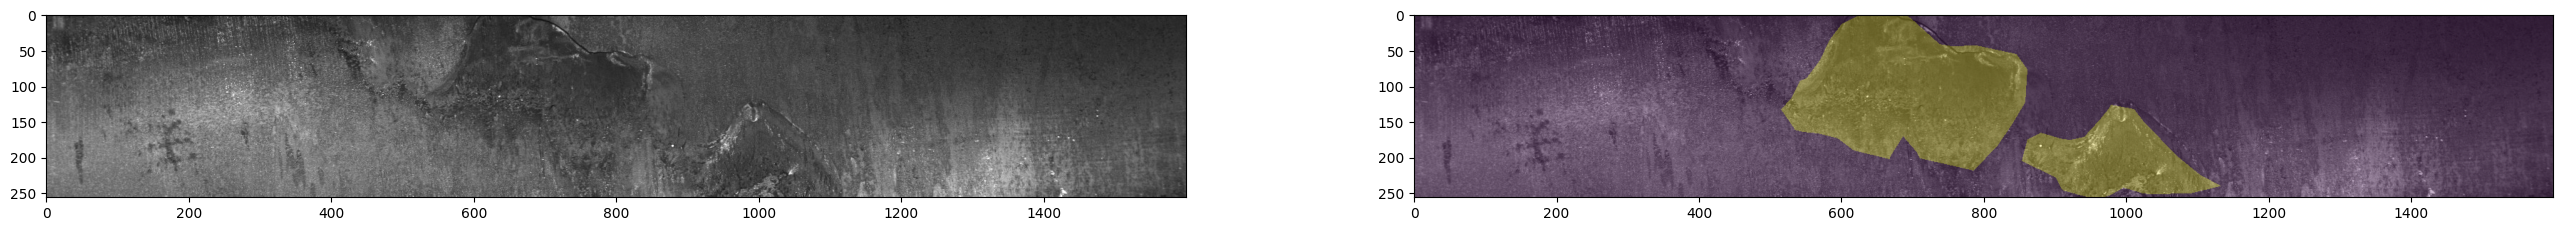

In [22]:
plot_image_mask(3)

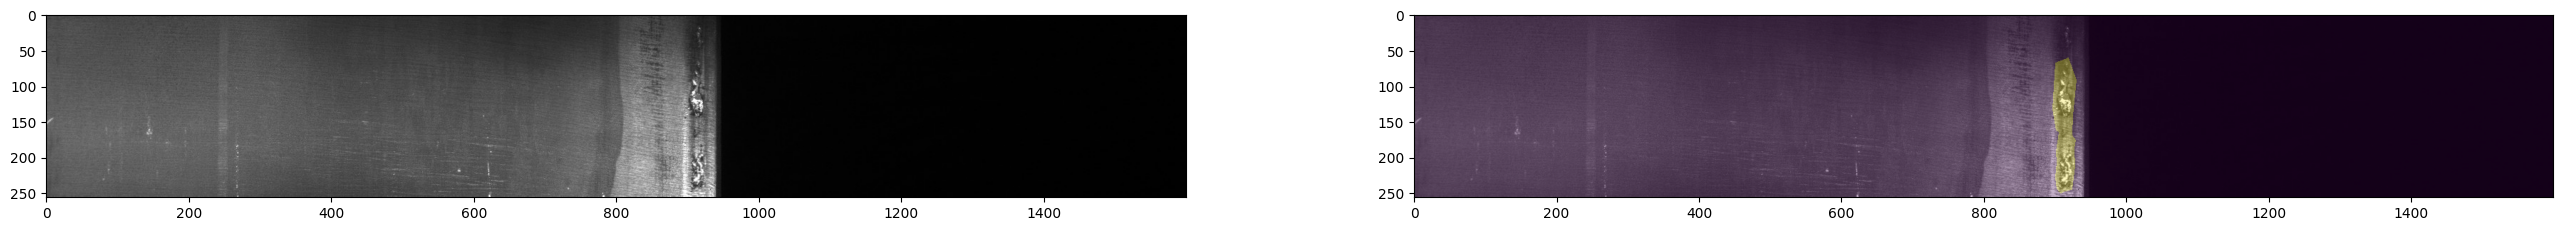

In [23]:
plot_image_mask(4)

# MASK TO RLE

In [24]:
img_id, mask = get_mask(3)
np.unique(mask)

array([0, 4], dtype=uint8)

In [27]:
img_id, label, rle = train_df.iloc[3]
label

np.int64(4)

In [29]:
mask.flatten()    

array([0, 0, 0, ..., 0, 0, 0], shape=(409600,), dtype=uint8)

In [ ]:
# 